In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('incidents_small.csv', nrows=10000, parse_dates=['Date'])
df.shape

(10000, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   IncidntNum  10000 non-null  int64         
 1   Category    10000 non-null  object        
 2   Descript    10000 non-null  object        
 3   DayOfWeek   10000 non-null  object        
 4   Date        10000 non-null  datetime64[ns]
 5   Time        10000 non-null  object        
 6   PdDistrict  10000 non-null  object        
 7   Resolution  10000 non-null  object        
 8   Address     10000 non-null  object        
 9   X           10000 non-null  float64       
 10  Y           10000 non-null  float64       
 11  Location    10000 non-null  object        
 12  PdId        10000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1015.8+ KB


In [8]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,2016-04-25,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410590e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,2016-01-05,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600140e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,2016-01-01,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600030e+13


In [9]:
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [10]:
cols_to_drop = ['IncidntNum', 'Address','Location','PdId']
df.drop(columns=cols_to_drop, inplace=True)

In [14]:
df['Category'] =  df['Category'].apply(lambda val: val.lower())
df['Descript'] =  df['Descript'].apply(lambda val: val.lower())
df['PdDistrict'] =  df['PdDistrict'].apply(lambda val: val.lower())
df['Resolution'] =  df['Resolution'].apply(lambda val: val.lower())
df.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,X,Y
0,weapon laws,poss of prohibited weapon,Friday,2016-01-29,11:00,southern,"arrest, booked",-122.403405,37.775421
1,weapon laws,"firearm, loaded, in vehicle, possession or use",Friday,2016-01-29,11:00,southern,"arrest, booked",-122.403405,37.775421
2,warrants,warrant arrest,Monday,2016-04-25,14:59,bayview,"arrest, booked",-122.388856,37.729981
3,non-criminal,lost property,Tuesday,2016-01-05,23:50,tenderloin,none,-122.412971,37.785788
4,non-criminal,lost property,Friday,2016-01-01,00:30,mission,none,-122.419672,37.765050


In [16]:
df['Category'].value_counts()

larceny/theft                  1562
other offenses                 1473
non-criminal                   1238
assault                        1073
warrants                        555
vehicle theft                   529
vandalism                       475
burglary                        458
suspicious occ                  440
drug/narcotic                   396
missing person                  364
robbery                         268
fraud                           188
secondary codes                 146
trespass                        145
weapon laws                     141
recovered vehicle                77
sex offenses, forcible           74
prostitution                     59
stolen property                  55
drunkenness                      50
forgery/counterfeiting           48
disorderly conduct               44
driving under the influence      32
arson                            28
kidnapping                       22
runaway                          13
bribery                     

In [23]:
categorydf = df.groupby(['Category','PdDistrict'],as_index=False)['Descript'].count()
categorydf

,Category,PdDistrict,Descript
0,arson,bayview,5
1,arson,central,3
2,arson,ingleside,2
3,arson,mission,4
4,arson,northern,1
...,...,...,...
288,weapon laws,park,6
289,weapon laws,richmond,8
290,weapon laws,southern,31
291,weapon laws,taraval,7


In [36]:
categorydf[categorydf['Category'] == 'weapon laws'] # filter

,Category,PdDistrict,Descript
283,weapon laws,bayview,17
284,weapon laws,central,9
285,weapon laws,ingleside,10
286,weapon laws,mission,25
287,weapon laws,northern,13
288,weapon laws,park,6
289,weapon laws,richmond,8
290,weapon laws,southern,31
291,weapon laws,taraval,7
292,weapon laws,tenderloin,15


dataframe filtering
```
df[ df['column'] == 'value' ]
```

In [38]:
timeline_df = df[['Date','Category','PdDistrict']].copy()
timeline_df.sort_values(by='Date', inplace=True)
timeline_df.set_index('Date', inplace=True)

In [42]:
timeline_df.resample('M').count()['Category']

Date
2016-01-31    2097
2016-02-29    2383
2016-03-31    3359
2016-04-30    1321
2016-05-31      82
2016-06-30     111
2016-07-31     149
2016-08-31     160
2016-09-30     138
2016-10-31     182
2016-11-30      13
2016-12-31       5
Freq: M, Name: Category, dtype: int64

<AxesSubplot: xlabel='Date'>

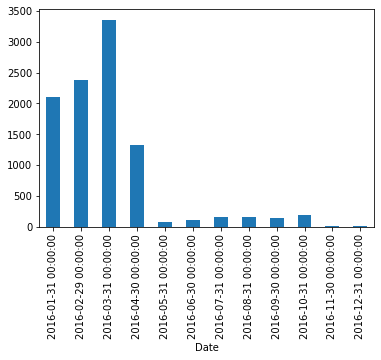

In [43]:
timeline_df.resample('M').count()['Category'].plot(kind='bar')

In [46]:
timeline_df.resample('3M').count()['Category']

Date
2016-01-31    2097
2016-04-30    7063
2016-07-31     342
2016-10-31     480
2017-01-31      18
Freq: 3M, Name: Category, dtype: int64

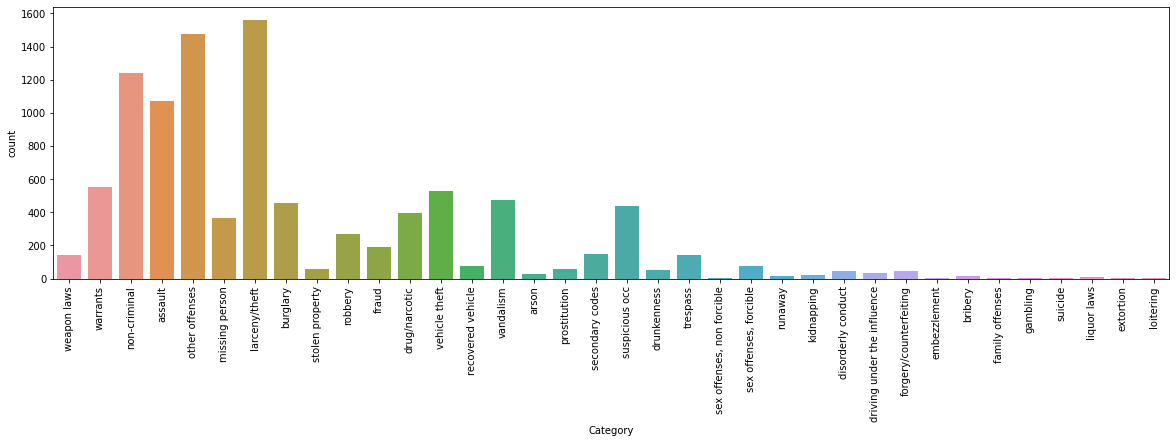

In [52]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(df, x='Category', ax= ax)
plt.xticks(rotation=90)
plt.show()

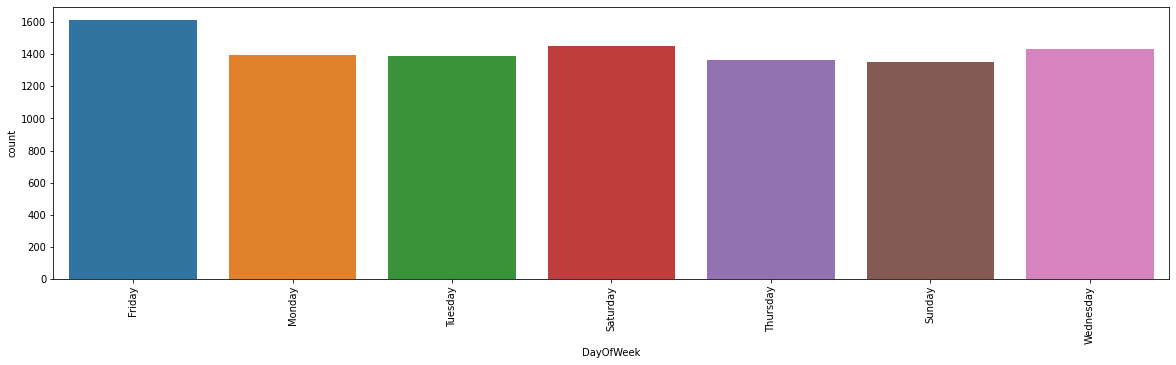

In [53]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(df, x='DayOfWeek', ax= ax)
plt.xticks(rotation=90)
plt.show()

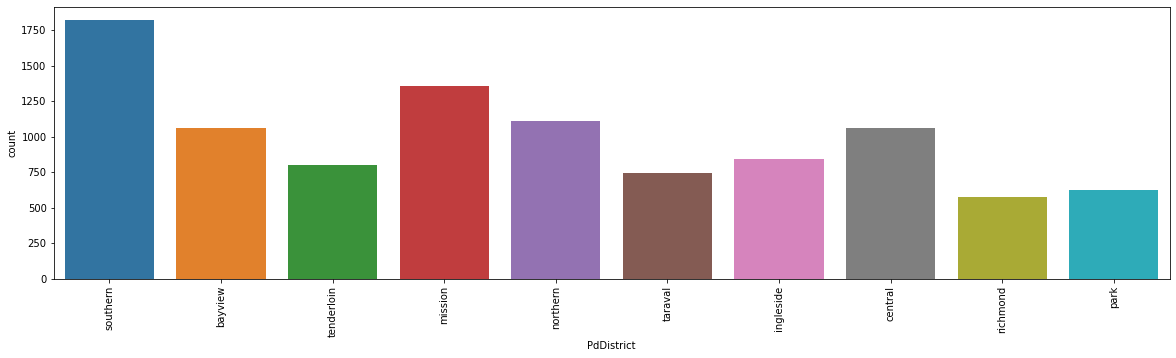

In [54]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(df, x='PdDistrict', ax= ax)
plt.xticks(rotation=90)
plt.show()

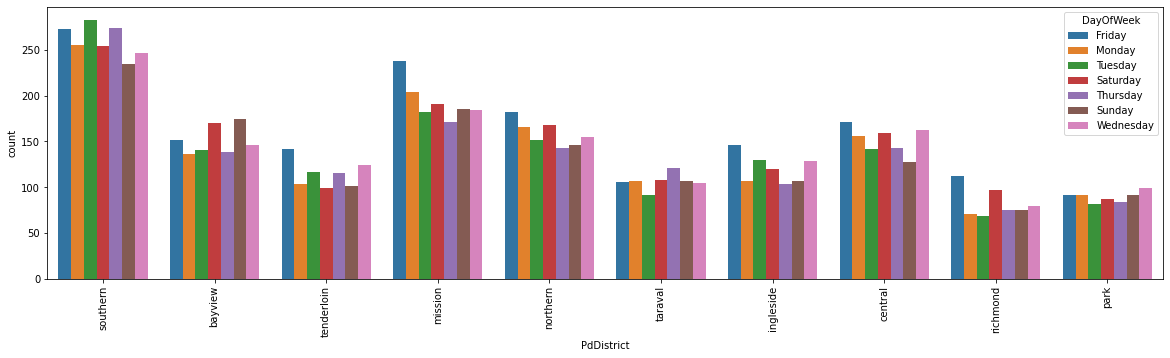

In [55]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(df, x='PdDistrict', ax= ax, hue='DayOfWeek')
plt.xticks(rotation=90)
plt.show()

`pip install folium`